In [ ]:
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [ ]:
class KMeans:
    def __init__(self, k, max_iteracoes=100):
        self.k = k
        self.max_iteracoes = max_iteracoes
        self.centroides = None
        self.clusters = None
        

    def distancia_euclidiana(self, ponto1, ponto2):
        """Calcula a distância euclidiana entre dois pontos."""
        return math.sqrt(np.sum((np.array(ponto1) - np.array(ponto2)) ** 2))


    def inicializar_centroides(self, dados):
        self.centroides = random.sample(dados, self.k)


    def atribuir_pontos_a_clusters(self, dados):
        self.clusters = [[] for _ in range(self.k)]
        for ponto in dados:
            distancias = [self.distancia_euclidiana(ponto, centroide) for centroide in self.centroides]
            cluster_atual = distancias.index(min(distancias))
            self.clusters[cluster_atual].append(ponto)


    def atualizar_centroides(self):
        centroides_antigos = self.centroides.copy()
        for i, cluster in enumerate(self.clusters):
            novo_centroide = np.mean(cluster, axis=0) if cluster else self.centroides[i]
            self.centroides[i] = novo_centroide
        return np.array_equal(self.centroides, centroides_antigos)


    def fit(self, dados):

        dados = list(dados)
        self.inicializar_centroides(dados)
        count_iteration = 0
        for _ in range(self.max_iteracoes):
            self.atribuir_pontos_a_clusters(dados)
            convergiu = self.atualizar_centroides()
            count_iteration +=1
            if convergiu:
                print(count_iteration)
                break
            self.plot_clusters()  # Gera o gráfico a cada iteração


    def plot_clusters(self): 
        plt.figure(figsize=(4, 4))  # Definindo o tamanho da figura
        for i, cluster in enumerate(self.clusters):
            x = [ponto[0] for ponto in cluster]
            y = [ponto[1] for ponto in cluster]
            plt.scatter(x, y, label=f"Cluster {i+1}")
        
        centroides_x = [centroide[0] for centroide in self.centroides]
        centroides_y = [centroide[1] for centroide in self.centroides]
        plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides Finais')


        plt.xlabel('Característica 1')
        plt.ylabel('Característica 2')
        plt.title('Algoritmo K-means - Conjunto de Dados Blob')
        plt.legend()
        plt.show()

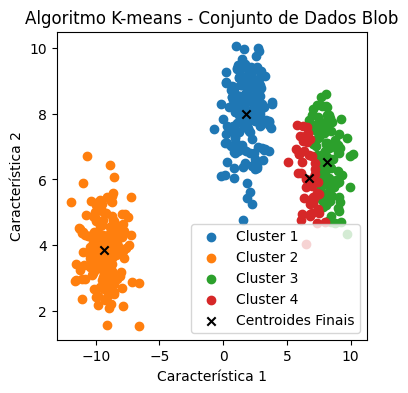

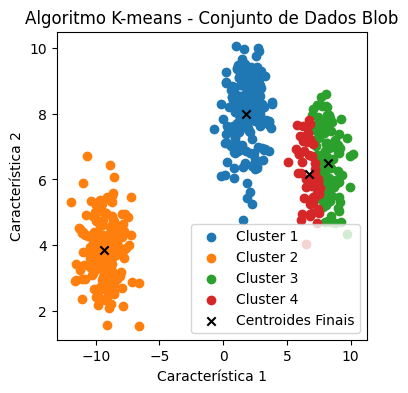

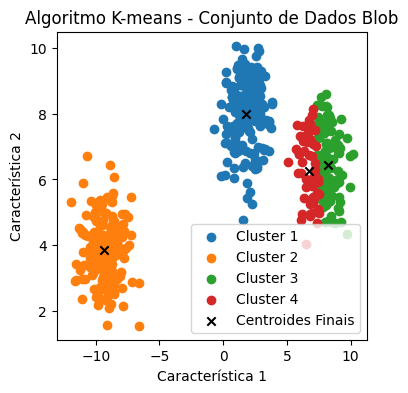

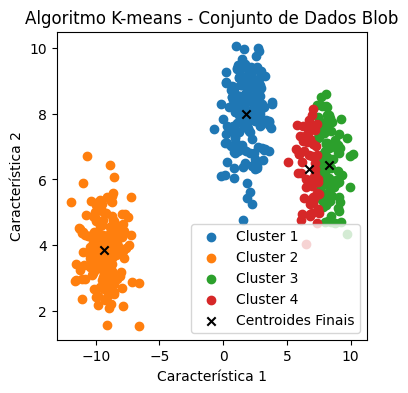

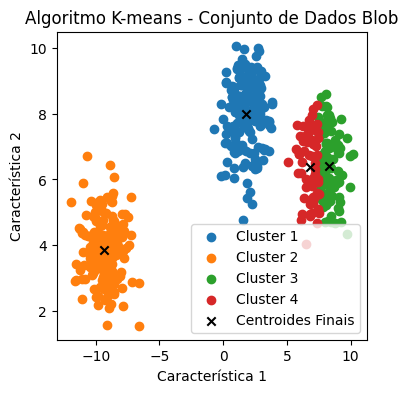

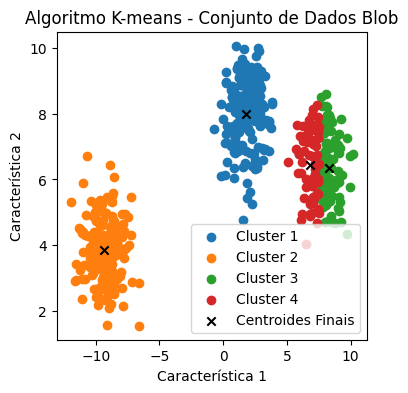

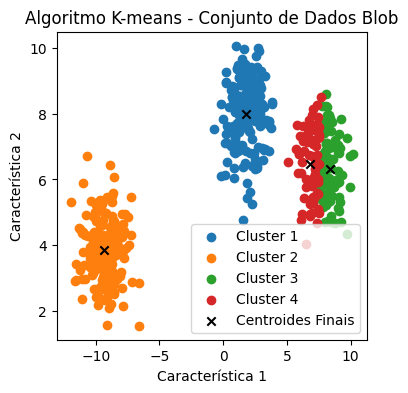

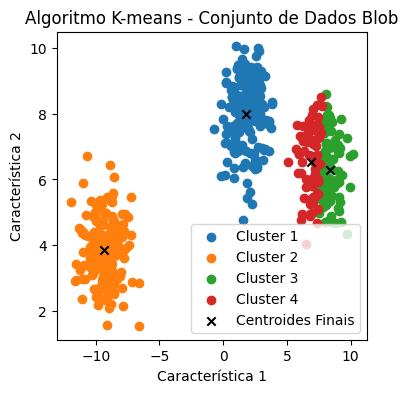

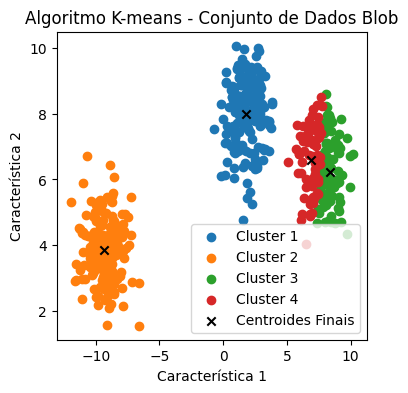

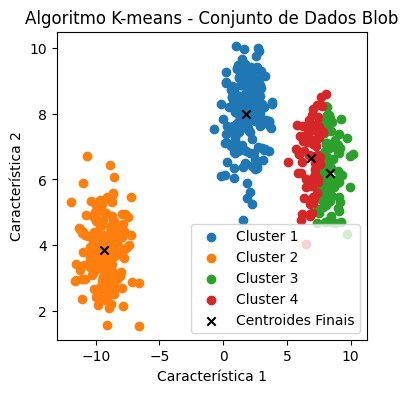

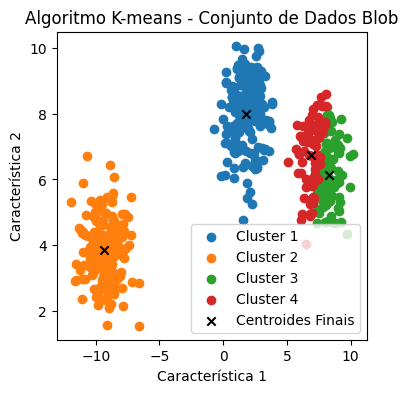

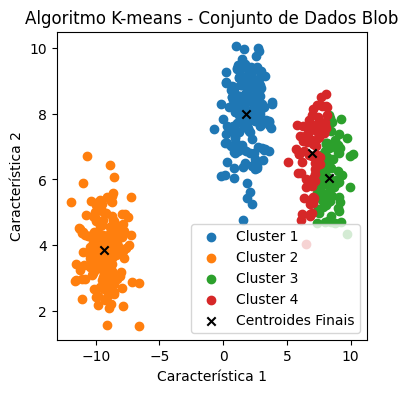

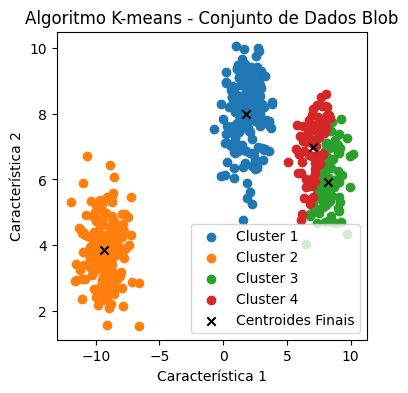

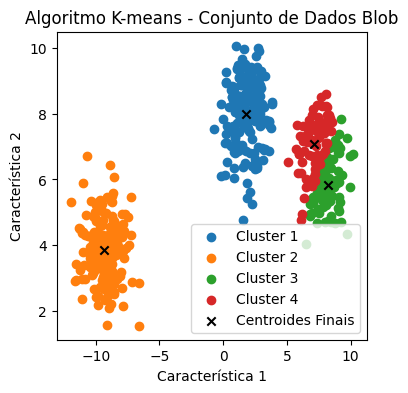

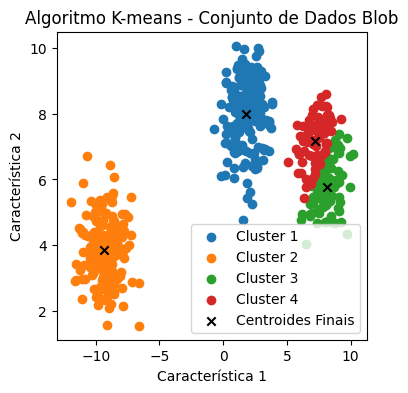

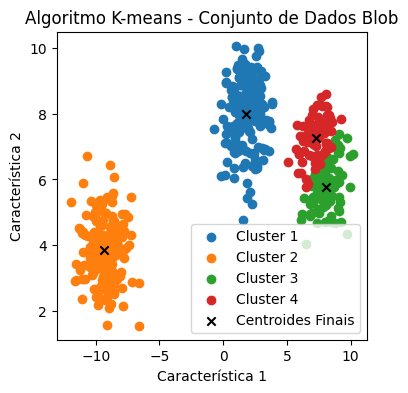

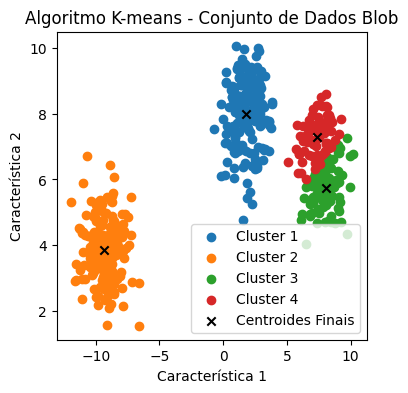

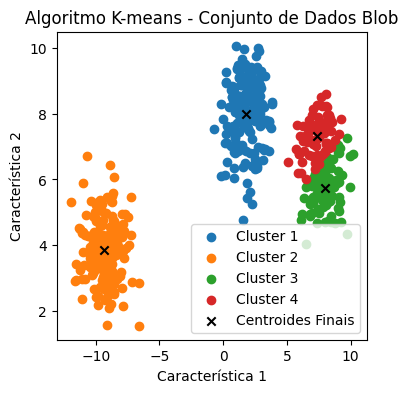

19


In [ ]:
if __name__ == '__main__':
    # Gerar conjunto de dados Blob
    dados, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

    k = 4  # Número de clusters desejado
    iteracoes = 100
    kmeans = KMeans(k, iteracoes)
    kmeans.fit(dados)

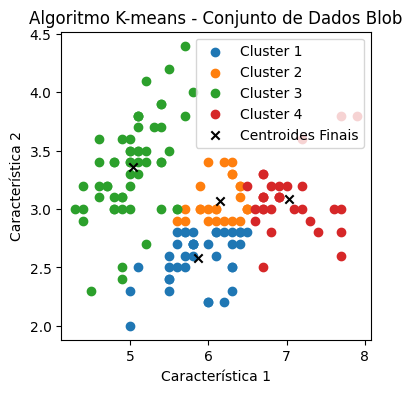

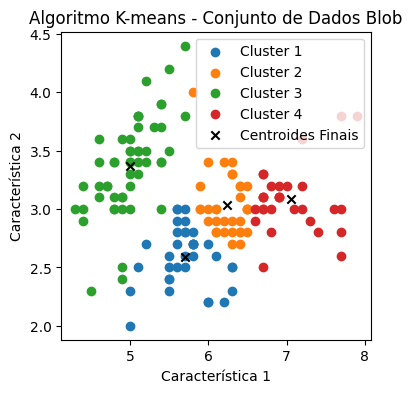

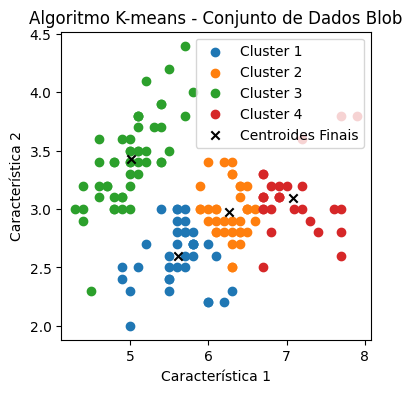

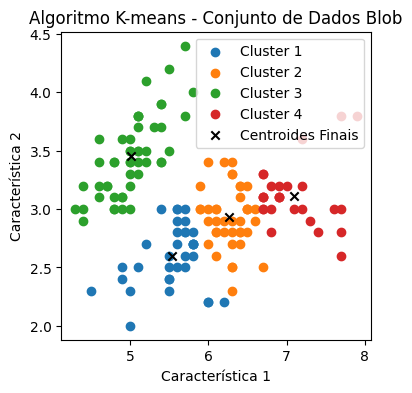

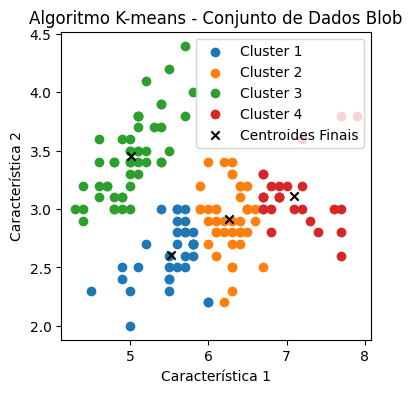

6


In [ ]:
from sklearn.datasets import load_iris
#--------------------------------------------------------------------------------
    # Carregar conjunto de dados Iris
iris = load_iris()
dados = iris.data[:, :2]  # Utilizar apenas as duas primeiras características

k = 4  # Número de clusters desejado
iteracoes = 100
kmeans = KMeans(k, iteracoes)
kmeans.fit(dados)